## TODOs
- make script out of this (but first make it pretty)
- plot design
    - better ordering of rows
    - better simple features name
    - title

In [2]:
import pandas as pd

df = pd.read_csv('./results/data/nb201_all.csv', index_col=0)
df.head()

,cfg,dataset,data_seed,proxy,train_size,use_all_proxies,use_features,use_flops_params,use_onehot,tau,corr,fit_time,test_time
0,../zc_combine/configs/nb201_full.json,cifar100,42.0,NaN,1024,True,False,NaN,False,0.808887,0.949089,1.141518,0.135411
1,../zc_combine/configs/nb201_full.json,cifar100,43.0,NaN,1024,True,False,NaN,False,0.807989,0.948160,0.951741,0.141485
2,../zc_combine/configs/nb201_full.json,cifar100,44.0,NaN,1024,True,False,NaN,False,0.807041,0.947862,0.744174,0.116246
3,../zc_combine/configs/nb201_full.json,cifar100,45.0,NaN,1024,True,False,NaN,False,0.807063,0.947255,0.770656,0.094718
4,../zc_combine/configs/nb201_full.json,cifar100,46.0,NaN,1024,True,False,NaN,False,0.811425,0.949809,0.856378,0.099119


In [8]:
df['use_flops_params'].fillna(False, inplace=True)

In [20]:
def get_name(row):
    strset = [
        "ZCP" if row['use_all_proxies'] else None,
        "features" if row['use_features'] else None,
        "FP" if row['use_flops_params'] and not row['use_all_proxies'] else None,
        "onehot" if row['use_onehot'] else None
    ]
    
    return ' + '.join([s for s in strset if s is not None])

In [21]:
df['name'] = [get_name(df.iloc[i]) for i in range(len(df))]

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

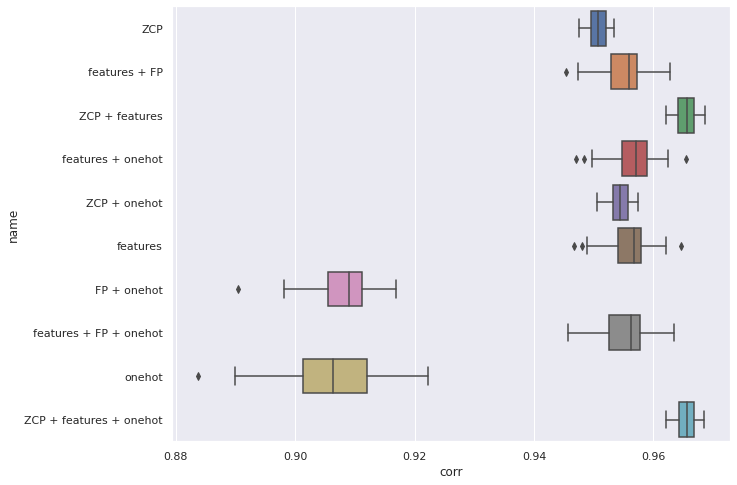

In [30]:
dataset = 'cifar10'
train_size = 1024
metric = 'tau'

plotdf = df[(df['dataset'] == dataset) & (df['train_size'] == train_size)]

plt.figure(figsize=(10, 8))
sns.boxplot(data=plotdf, x=metric, y='name')
plt.show()